<img src="https://eloutput.com/wp-content/uploads/2022/01/todo-sobre-lego.jpg">

# Introduction
Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.
It may not be widely known, but Lego has had its share of ups and downs since its inception in the early 20th century. This includes a particularly rough period in the late 90s. Lego was only able to survive due to a successful internal brand (Bionicle) and the introduction of its first licensed series: Star Wars. There are two questions you will need to answer to complete this project.
Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:

* datasets/lego_sets.csv:

 * set_num: A code that is unique to each set in the dataset. This column is critical, and a missing value indicates the set is a duplicate or invalid!
 * set_name: A name for every set in the dataset (note that this can be the same for different sets).
 * year: The date the set was released.
 * num_parts: The number of parts contained in the set. This column is not central to our analyses, so missing values are acceptable.
 * theme_name: The name of the sub-theme of the set.
 * parent_theme: The name of the parent theme the set belongs to. Matches the 'name' column of the 'parent_themes' csv file.

* datasets/parent_themes.csv:

 * id: A code that is unique to every theme.
 * name: The name of the parent theme.
 * is_licensed: A Boolean column specifying whether the theme is a licensed theme.
   
You are a Data Analyst at Lego working with the Sales/Customer Success teams. The Account Executive responsible for the Star Wars partnership has asked for 
specific information in preparation for their meeting with the Star Wars team. Although Star Wars was critical to the survival of the brand, Lego has since 
introduced a wide variety of licensed sets over subsequent years.

Your two questions are as follows:

1. What percentage of all licensed sets ever released were Star Wars themed? Save your answer as a variable the_force in the form of an integer (e.g. 25).

2. In which year was Star Wars not the most popular licensed theme (in terms of number of sets released that year)? Save your answer as a variable new_era 
in the form of an integer (e.g. 2012).

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [174]:
sets = pd.read_csv("https://drive.google.com/uc?id=1Ux-xhPv8XhSa_vrHx2TJy-eci2zXntDU&export=download&authuser=0")
sets.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [175]:
parent = pd.read_csv("https://drive.google.com/uc?id=1UyE_9n2Ayj_v0vdnMhBI3B-Xh0YZ7Zd6&export=download&authuser=0")
parent.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [176]:
#Count Na values from 'set_num' in sets
print("Number of Na values in 'set_num': ", sets.set_num.isna().sum())

Number of Na values in 'set_num':  153


In [177]:
#Na values on 'set_num' makes the set untraceable, so we drop those columns
sets.dropna(subset=["set_num"], inplace=True)
print("Number of Na values in 'set_num': ", sets.set_num.isna().sum())

Number of Na values in 'set_num':  0


In [178]:
#We check for duplicates in sets
print("Number of duplicated values in 'set_num': ", sets.duplicated(subset=['set_num']).sum())

Number of duplicated values in 'set_num':  0


In [179]:
#Count Na values from 'id' in parent
print("Number of Na values in 'id': ", parent.id.isna().sum())

Number of Na values in 'id':  0


In [180]:
#We check for duplicates in parent
print("Number of duplicated values in 'id': ", parent.duplicated(subset=['id']).sum())

Number of duplicated values in 'id':  0


In [181]:
#Joining sets
sets_parent = sets.merge(parent, how="left", left_on="parent_theme", right_on="name")
sets_parent.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,name_y,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,Legoland,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,Town,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,Castle,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,Space,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,Space,False


In [182]:
#Calculating % Star Wars themed
licensed = sets_parent.query("is_licensed == True")
the_force = licensed["name_y"].str.contains("Star Wars").sum() / licensed.shape[0]
the_force = int(the_force * 100)
print("% of Star Wars themed sets from all licensed ones: ", the_force, '%')

% of Star Wars themed sets from all licensed ones:  51 %


In [183]:
years = np.sort(licensed.year.unique())
years

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [184]:
star_wars = []
for yr in years:
  slice = licensed[licensed['year'] == yr]
  SW = slice['name_y'].str.contains('Star Wars').sum()
  star_wars = np.append(star_wars, SW / len(slice))
star_wars

array([1.        , 0.83870968, 0.56      , 0.56      , 0.8       ,
       0.5       , 0.8       , 0.45833333, 0.76190476, 0.53488372,
       0.8125    , 0.47619048, 0.39506173, 0.39449541, 0.40697674,
       0.45454545, 0.54205607, 0.50413223, 0.38461538])

In [185]:
new_era = int(years[np.where(star_wars == star_wars.min())])
new_era

2017

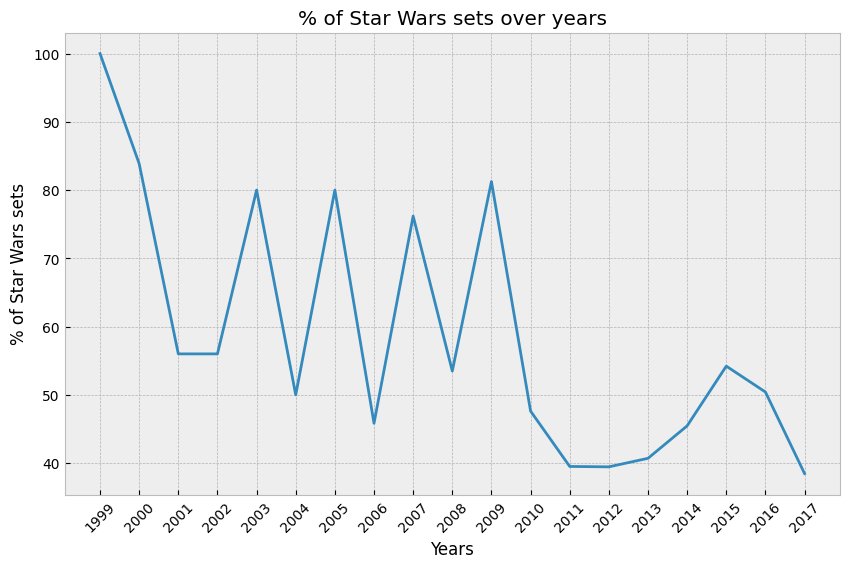

In [186]:
plt.figure(figsize=(10,6))
plt.style.use('bmh')
plt.plot(years, star_wars*100)
plt.title('% of Star Wars sets over years')
plt.xlabel('Years')
plt.ylabel('% of Star Wars sets')
plt.xticks(np.arange(1999, 2018), rotation=45)
plt.show()
